<a href="https://colab.research.google.com/github/yiyichanmyae/time_series/blob/main/3_working_with_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

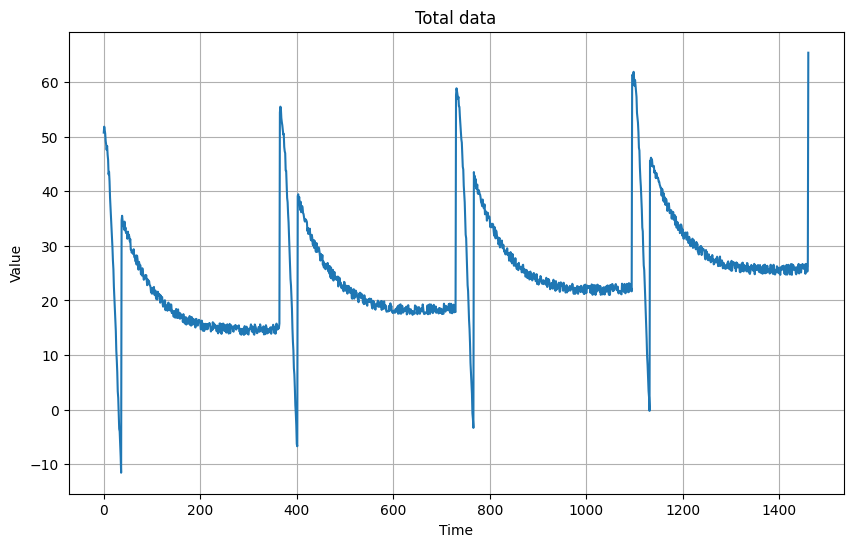

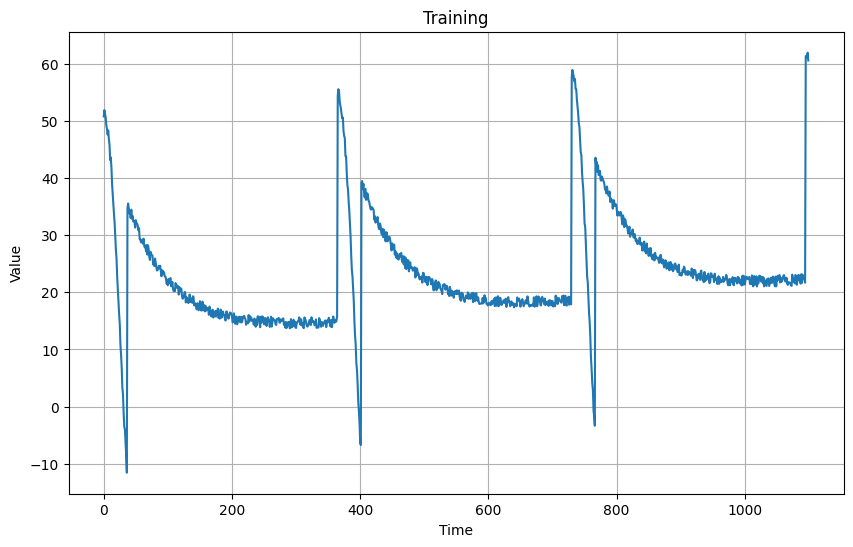

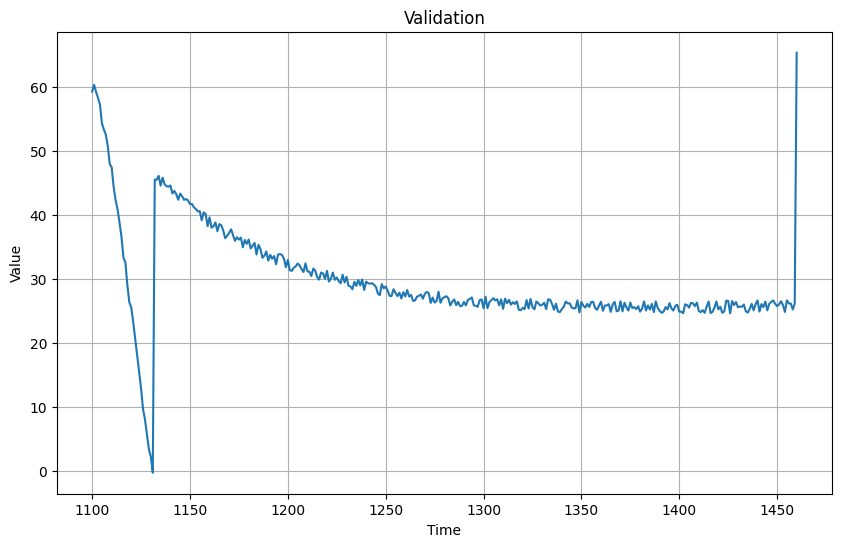

mse : 1.0, mae : 1.0 for series of Zeros and prediction of Ones

mse : 1.0, mae : 1.0 for series of Zeros and prediction of Ones

metrics are numpy numerics types : True

NAIVE FORECAST
validation sereis has shape : (361,)

naive forecast has shape : (361,)
comparable with validation series : True
Zoom In
mse : 11.17, mae : 1.07 for naive forecast

MOVING AVERAGE
whole SERIES has 1461 elements so the moving average forecast should be 1431 elements
moving average forecast with whole SERIES hs shape: (1431,)

moving average forecast with whole SERIES  has shape: (361,)

comparable with validation series: True
mse: 63.57, mae : 3.65 for moving average forecast

DIFFERENCING
whole SERIES  has 1461 elements so the differencing should have 1096 elements

diff series has shape : (1096,)
x-coordinate of diff series has shape : (1096,)


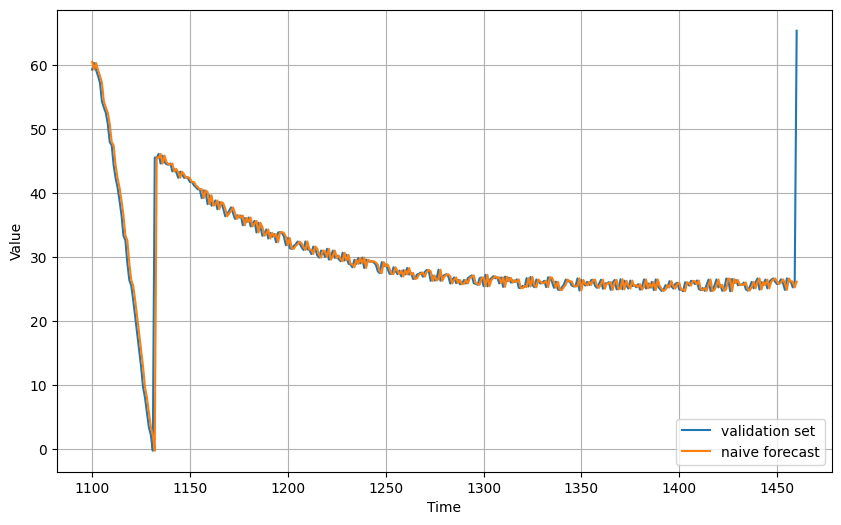

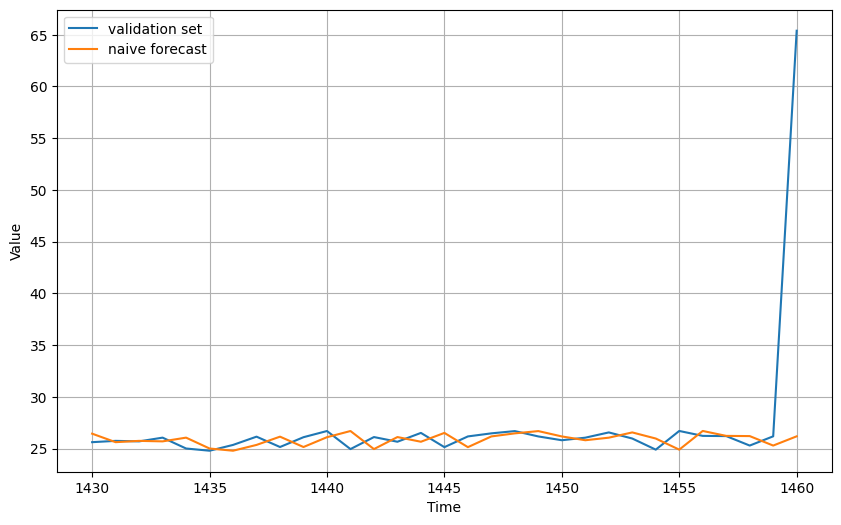

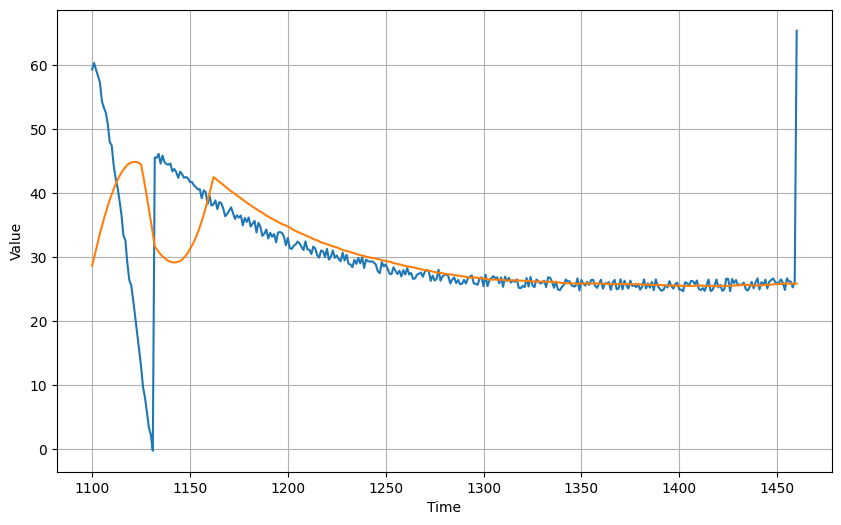

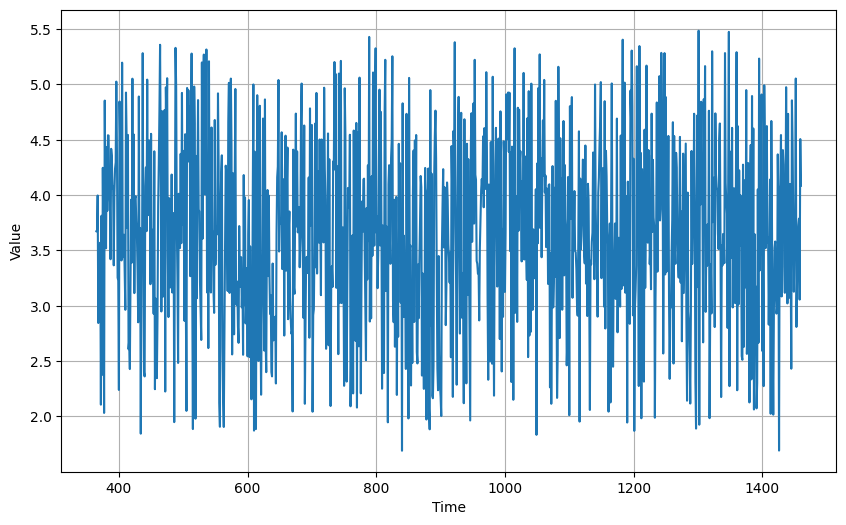

moving average forecast with diff seris has shape : (1046,)
moving average forecast with diff series after slicing has shape : (361,)
comparable with validation series : True


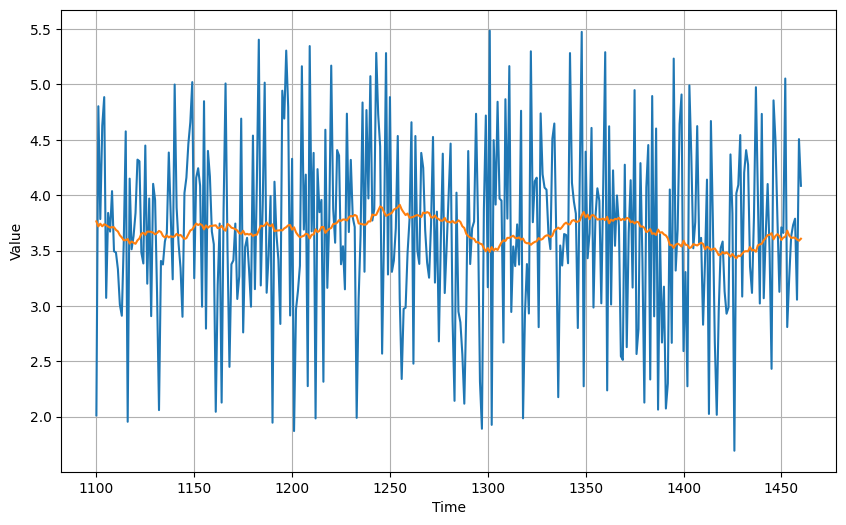

past series has shape: (361,)
moving average forecast with diff series after slicing has shape : (361,)
comparable with validation series : True


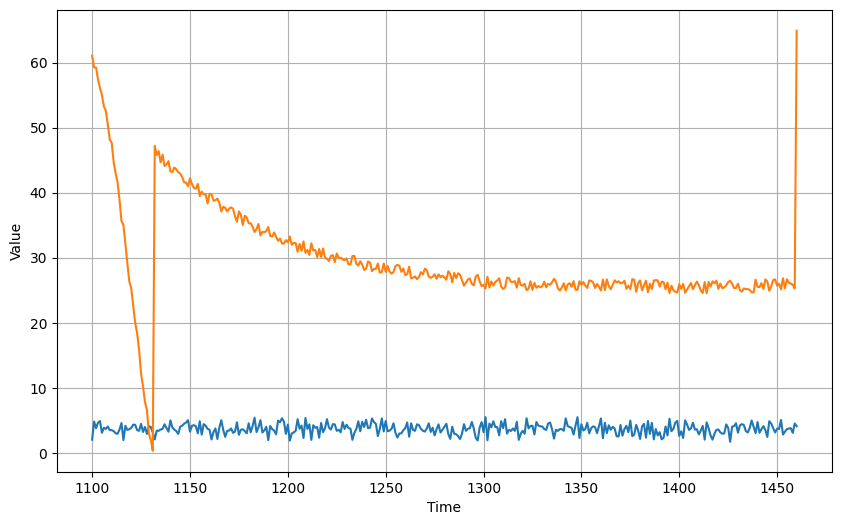

mse: 0.69, mae: 0.67 for moving average plus past forecast
SMOOTH
smooth past series has shape: (361,)

moving average forecast with diff series plus past has shape : [60.15824  59.478123 58.57074  57.601852 56.525826 55.27781  53.934475
 52.47238  50.8619   49.28875  47.551483 45.61356  43.76711  41.704952
 39.557564 37.38861  35.171177 32.923244 30.647615 28.310345 25.98863
 23.668365 21.196035 18.804058 16.544266 14.178686 11.865605  9.633728
 12.343697 15.076744 18.124851 21.389023 24.976439 28.600946 32.347687
 36.524536 40.676937 44.945877 44.627197 44.401844 44.081207 43.934776
 43.57636  43.32891  43.02585  42.6148   42.50695  42.349045 42.06121
 41.764217 41.601513 41.270016 41.021164 40.83999  40.64456  40.33962
 40.136818 39.957886 39.780777 39.609035 39.38945  39.286625 38.962097
 38.770752 38.580414 38.429302 38.18787  38.0521   37.916924 37.654785
 37.298847 37.15952  37.10163  36.805428 36.685608 36.625107 36.37454
 36.141747 35.860992 35.624325 35.483006 35.29708  34.97

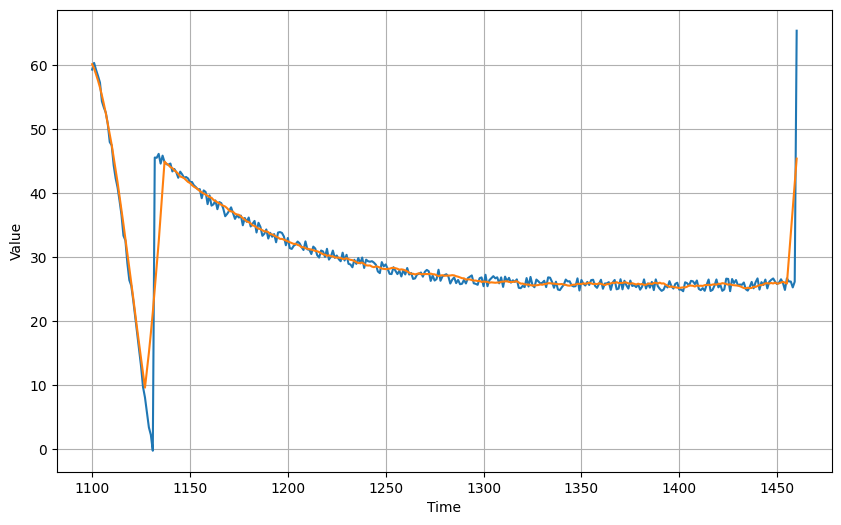

mse: 8.05, mae: 1.04 for moving average plus smooth past forecast


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define time step to split the series
SPLIT_TIME = 1100

# helper functions to generate and plot time sereies
def trend(time, slop=0):
  """A treand over time"""
  return slope*time

def seasonal_pattern(season_time):
  """Just an arbitrary pattern"""
  return np.where( season_time < 0.1,
                  np.cos(season_time *7 * np.pi),
                   1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  """Repeats the same pattern at each period"""
  season_time =((time+phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
  """Adds noise to the series"""
  rnd = np.random.RandomState(seed)
  return rnd.random(len(time)) * noise_level

def plot_series(time, series, format="-", title="", label=None, start=0, end=None):
  """Plot the series"""
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title(title)
  if label:
    plt.legend()
  plt.grid(True)

# TRAIN_VAL_SPLIT
def train_valid_split(time, series, time_step=SPLIT_TIME):

  time_train = time[:time_step]
  series_train = series[:time_step]

  time_valid = time[time_step:]
  series_valid = series[time_step:]

  return time_train, series_train, time_valid, series_valid

def compute_metrics(true_series, forecast):

  mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
  mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
  return mse, mae

# moving average function
"""
  This function will receive the complete SERIES and the returned series will then be sliced to match the validation period so your function doesn't need to account for matching the series to the validation period.
"""
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
      If window_size=1, then this is equivalent to naive forecast
  """
  forecast = []

  for time in range(len(series) - window_size):
    forecast.append(series[time:time+window_size].mean())

  np_forecast = np.array(forecast)
  return np_forecast

# GENERATE TIME SEIES DATA
TIME  = np.arange(4 * 365 + 1, dtype="float32")

# Initial seeires is just a straight line with a y-intercept
y_intercept = 10
slope = 0.01
SERIES = trend(TIME, slope) + y_intercept

# Adding seasonality
amplitude = 40
SERIES  += seasonality(TIME, period=365, amplitude=amplitude)

# Adding some noise
noise_level = 2
SERIES += noise(TIME, noise_level, seed=42)

# Plot the series
plt.figure(figsize=(10,6))
plot_series(TIME, SERIES, title="Total data")
plt.show()

# TEST train_valid_split function
time_train, series_train, time_valid, series_valid = train_valid_split(TIME, SERIES)

plt.figure(figsize=(10, 6))
plot_series(time_train, series_train, title="Training")
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid, title="Validation")
plt.show()

# EVALUATION METRICS

# TEST compute_metrics function
#Define some dummy series
zeros = np.zeros(5)
ones = np.ones(5)

mse, mae = compute_metrics(zeros, ones)

print(f"mse : {mse}, mae : {mae} for series of Zeros and prediction of Ones\n")
print(f"mse : {mse}, mae : {mae} for series of Zeros and prediction of Ones\n")

print(f"metrics are numpy numerics types : {np.issubdtype(type(mse), np.number)}")

# FORECASTING

# Naive Forecast
print("\nNAIVE FORECAST")
"""
Define the naive_forecast variable below. This series should be identical to the validation one but delayed one time step. It also receives the split time step of the series for ease of computing the delayed series.

Notice that this series should leave out the last element since this element does not exists in the validation set and you will not be able to compute the evaluation metrics if this element is kept.
"""
naive_forecast = SERIES[SPLIT_TIME -1 : -1]

print(f"validation sereis has shape : {series_valid.shape}\n")
print(f"naive forecast has shape : {naive_forecast.shape}")
print(f"comparable with validation series : {series_valid.shape == naive_forecast.shape}")

plt.figure(figsize = (10, 6))
plot_series(time_valid, series_valid, label="validation set")
plot_series(time_valid, naive_forecast, label="naive forecast")

print("Zoom In")
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid, start=330, end=361, label="validation set")
plot_series(time_valid, naive_forecast, start=330, end=361, label="naive forecast")

mse, mae = compute_metrics(series_valid, naive_forecast)
print(f"mse : {mse:.2f}, mae : {mae:.2f} for naive forecast")

# MOVING AVERAGE
print("\nMOVING AVERAGE")
print(f"whole SERIES has {len(SERIES)} elements so the moving average forecast should be {len(SERIES)-30} elements")

moving_avg = moving_average_forecast(SERIES, window_size=30)
print(f"moving average forecast with whole SERIES hs shape: {moving_avg.shape}\n")

# Slice it so it matches the validation period
moving_avg = moving_avg[1100 - 30:]
print(f"moving average forecast with whole SERIES  has shape: {moving_avg.shape}\n")
print(f"comparable with validation series: {series_valid.shape == moving_avg.shape}")

plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, moving_avg)

mse, mae = compute_metrics(series_valid, moving_avg)
print(f"mse: {mse:.2f}, mae : {mae:.2f} for moving average forecast")

# DIFFERENCING
print("\nDIFFERENCING")
diff_series = (SERIES[365:]- SERIES[:-365])
diff_time = TIME[365:]

print(f"whole SERIES  has {len(SERIES)} elements so the differencing should have {len(SERIES)-365} elements\n")
print(f"diff series has shape : {diff_series.shape}")
print(f"x-coordinate of diff series has shape : {diff_time.shape}")

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

# Apply the moving avg to diff series
diff_moving_avg = moving_average_forecast(diff_series, 50)

print(f"moving average forecast with diff seris has shape : {diff_moving_avg.shape}")

# Perform the correct slicing
diff_moving_avg = diff_moving_avg[SPLIT_TIME - 365 - 50:]

print(f"moving average forecast with diff series after slicing has shape : {diff_moving_avg.shape}")
print(f"comparable with validation series : {series_valid.shape == diff_moving_avg.shape}")

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[1100 - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

# slice the whole SERIES
past_series = SERIES[SPLIT_TIME - 365 : -365]

print(f"past series has shape: {past_series.shape}")

# Add the past to the moving average of diff series
diff_moving_avg_plus_past = past_series + diff_moving_avg

print(f"moving average forecast with diff series after slicing has shape : {diff_moving_avg_plus_past.shape}")
print(f"comparable with validation series : {series_valid.shape == diff_moving_avg_plus_past.shape}")

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[1100 - 365:])
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()


# Compute evaluation metrics
mse, mae = compute_metrics(series_valid, diff_moving_avg_plus_past)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for moving average plus past forecast")

# SMOOTH
print("SMOOTH")
# Perform the correct split of SERIES
smooth_past_series = moving_average_forecast(SERIES[SPLIT_TIME - 370 : -360], 10)

print(f"smooth past series has shape: {smooth_past_series.shape}\n")

# Add the smoothed out past values to the moving avg of diff series
diff_moving_avg_plus_smooth_past = smooth_past_series + diff_moving_avg

print(f"moving average forecast with diff series plus past has shape : {diff_moving_avg_plus_smooth_past}")

plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

# Compute evaluation metrics
mse, mae = compute_metrics(series_valid, diff_moving_avg_plus_smooth_past)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for moving average plus smooth past forecast")
